In [1]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from scipy.optimize import curve_fit
import warnings
from sortedcollections import OrderedSet
# pd.set_option('display.max_rows', None)

In [46]:
root_path = Path('/Users/jiahaozhan/Desktop/data and scripts/Sivers_data')
fname = 'P10101_OSA_Set2.csv'

data_dir = root_path / fname
df = pd.read_csv(data_dir)

print(df.columns)
print(df.iloc[16000:16008])

Index(['Match Flag', 'Lot', 'Bar ID', 'Array ID', 'Chip ID', 'Device Type',
       'Wave', 'OSA1', 'OSA2', 'OSA3'],
      dtype='object')
      Match Flag     Lot  Bar ID  Array ID Chip ID Device Type     Wave  \
16000       Both  P10101      40         5      44        DFB8  1324.93   
16001       Both  P10101      40         5      44        DFB8  1324.94   
16002       Both  P10101      40         5      44        DFB8  1324.95   
16003       Both  P10101      40         5      44        DFB8  1324.96   
16004       Both  P10101      40         5      44        DFB8  1324.97   
16005       Both  P10101      40         5      44        DFB8  1324.98   
16006       Both  P10101      40         5      44        DFB8  1324.99   
16007       Both  P10101      40         5      44        DFB8  1325.00   

          OSA1     OSA2     OSA3  
16000 -69.5117 -67.1309 -67.8120  
16001 -69.4348 -67.7006 -67.3002  
16002 -70.5046 -66.8424 -66.6214  
16003 -69.2885 -68.0244 -67.4934  
16004 -69.3

/var/folders/ch/rfyq2j3x4fsf6nld0yfd9vkm0000gn/T/ipykernel_81236/1519228978.py:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_dir)


In [ ]:
# Use for Set 2
i = 3
id_l, id_u = (i-1)*2001, i*2001
dfb1 = df[id_l:id_u]
# plot spectrum
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.plot(dfb1['Wave'], dfb1['OSA1'], label=f'OSA{1}')
ax.plot(dfb1['Wave'], dfb1['OSA2'], label=f'OSA{2}')
ax.plot(dfb1['Wave'], dfb1['OSA3'], label=f'OSA{3}')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Transmission (dB)')
ax.legend()

In [47]:
bar_id, array_id, chip_id = OrderedSet(), OrderedSet(), OrderedSet()
bar_array_id = OrderedSet()

for id, row in df[0:].iterrows():
    b_id, a_id, c_id = row['Bar ID'], row['Array ID'], row['Chip ID']
    bar_id.add(b_id)
    array_id.add(a_id)
    chip_id.add(c_id)
    bar_array_id.add((b_id, a_id))

print(len(bar_id), bar_id)
print(len(array_id), array_id)
print(len(bar_array_id), bar_array_id)

18 OrderedSet([40, 41, 43, 45, 46, 47, 49, 55, 57, 59, 63, 66, 67, 70, 71, 73, 80, 81])
15 OrderedSet([5, 9, 10, 6, 11, 19, 14, 23, 7, 2, 15, 22, 17, 16, 18])
20 OrderedSet([(40, 5), (41, 9), (43, 10), (45, 6), (45, 11), (45, 19), (46, 14), (47, 19), (49, 23), (55, 7), (57, 2), (59, 15), (63, 22), (66, 14), (67, 17), (70, 16), (71, 14), (73, 18), (80, 17), (81, 14)])


In [ ]:
# Use for set 2
die = 19
id_offset = die * 8 * 2001

dfb = {}
for i in range(0,8):
    id_l, id_u = i*2001 + id_offset, (i+1)*2001 + id_offset
    dfb[i] = df[id_l:id_u]

In [44]:
# Use for set 1
die = 19
id_offset = die * 8 * 2001
wavel = np.arange(1305, 1325.01, 0.01)

dfb_1, dfb_2, dfb_3 = {}, {}, {}
for i in range(8):
    dfb_1[i], dfb_2[i], dfb_3[i] = [], [], []

for i in range(8):
    for j in range(i + id_offset, id_offset + 8*2001, 8):
        tr1, tr2, tr3 = df.iloc[j]['OSA1'], df.iloc[j]['OSA2'], df.iloc[j]['OSA3']
        dfb_1[i].append(tr1)
        dfb_2[i].append(tr2)
        dfb_3[i].append(tr3)

Text(1305.5, -10, '300 mA')

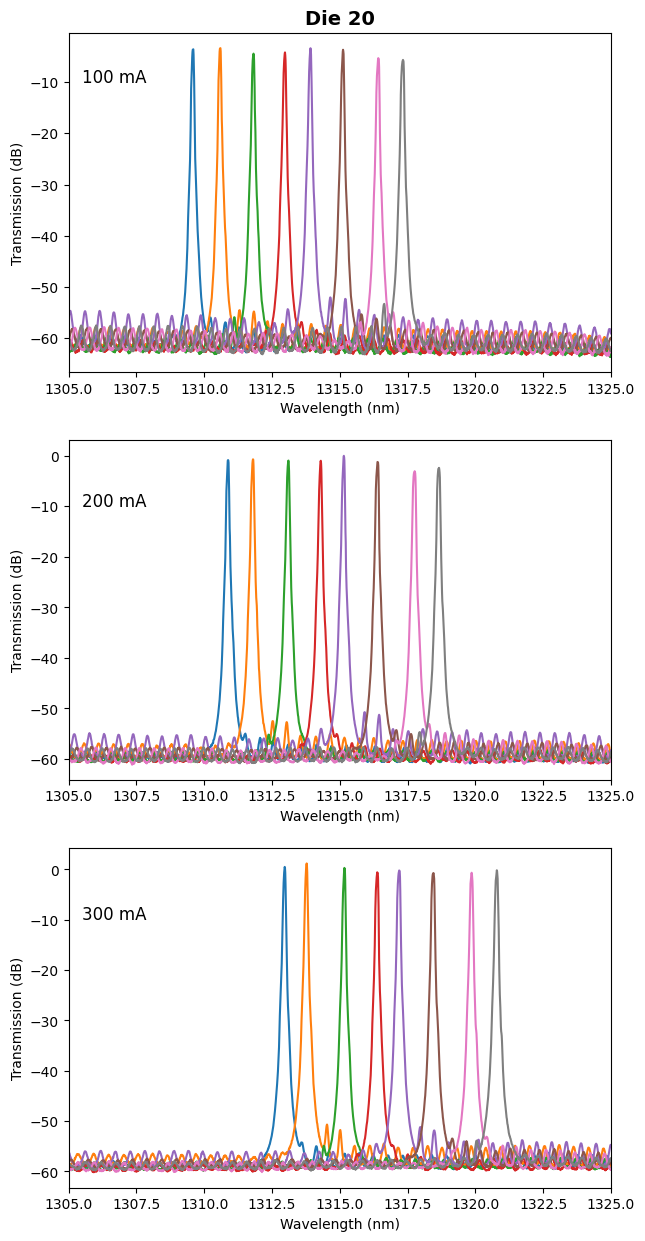

In [45]:
# plot spectrum
fig, axes = plt.subplots(3, 1, figsize=(7, 15))
ax = axes[0]
for i, ld in dfb_1.items():
    ax.plot(wavel, ld, label=f'DFB{i+1}')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Transmission (dB)')
# ax.legend()
ax.set_xlim([1305, 1325])
ax.text(1305.5, -10, '100 mA', fontsize=12)
ax.set_title(f'Die {die+1}', fontsize=14, weight='bold')

ax = axes[1]
for i, ld in dfb_2.items():
    ax.plot(wavel, ld, label=f'DFB{i+1}')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Transmission (dB)')
# ax.legend()
ax.set_xlim([1305, 1325])
ax.text(1305.5, -10, '200 mA', fontsize=12)

ax = axes[2]
for i, ld in dfb_3.items():
    ax.plot(wavel, ld, label=f'DFB{i+1}')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Transmission (dB)')
# ax.legend()
ax.set_xlim([1305, 1325])
ax.text(1305.5, -10, '300 mA', fontsize=12)
# fig.suptitle('Bar ID, ArrY ID')